In [2]:
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = 18,5
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
lst= ["f","ac","tv","wm"]
path1 = "C:/Users/DELL/Desktop/Cleaned_data/"
df_lst = []
for i in lst:
    df = pd.read_csv(f"{path1}c_{i}.csv")
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df.set_index(['Timestamp'],inplace=True)
    # df = df[[f"{i}_A",f"{i}_C"]]
    df = df[[f"{i}_A"]]
    df_lst.append(df)
    

In [4]:
df = pd.concat(df_lst,axis=1)
df.fillna(value=0,inplace=True)
df

,f_A,ac_A,tv_A,wm_A
Timestamp,,,,
2013-06-12 00:00:00,0.11,0.00,0.00,0.00
2013-06-12 00:00:01,0.21,0.00,0.00,0.00
2013-06-12 00:00:02,0.16,0.00,0.00,0.00
2013-06-12 00:00:03,0.20,0.00,0.00,0.00
2013-06-12 00:00:04,0.03,0.00,0.00,0.00
...,...,...,...,...
2013-08-03 23:59:55,0.13,0.00,0.00,0.00
2013-08-03 23:59:56,0.19,0.00,0.00,0.00
2013-08-03 23:59:57,0.17,0.00,0.00,0.00


In [5]:
df1 = pd.DataFrame([])
for i in range(1,len(df.columns)+1):
    for j in combinations(df.columns,i):
        print(j)
        if i ==1:
            df1[j[0]] = df[j[0]]
        else:
            df1["+".join(j)] = df1[list(j)].sum(axis=1)
        # print(df.columns)

('f_A',)
('ac_A',)
('tv_A',)
('wm_A',)
('f_A', 'ac_A')
('f_A', 'tv_A')
('f_A', 'wm_A')
('ac_A', 'tv_A')
('ac_A', 'wm_A')
('tv_A', 'wm_A')
('f_A', 'ac_A', 'tv_A')
('f_A', 'ac_A', 'wm_A')
('f_A', 'tv_A', 'wm_A')
('ac_A', 'tv_A', 'wm_A')
('f_A', 'ac_A', 'tv_A', 'wm_A')


In [6]:
df1

,f_A,ac_A,tv_A,wm_A,f_A+ac_A,f_A+tv_A,f_A+wm_A,ac_A+tv_A,ac_A+wm_A,tv_A+wm_A,f_A+ac_A+tv_A,f_A+ac_A+wm_A,f_A+tv_A+wm_A,ac_A+tv_A+wm_A,f_A+ac_A+tv_A+wm_A
Timestamp,,,,,,,,,,,,,,,
2013-06-12 00:00:00,0.11,0.00,0.00,0.00,0.11,0.11,0.11,0.00,0.00,0.00,0.11,0.11,0.11,0.00,0.11
2013-06-12 00:00:01,0.21,0.00,0.00,0.00,0.21,0.21,0.21,0.00,0.00,0.00,0.21,0.21,0.21,0.00,0.21
2013-06-12 00:00:02,0.16,0.00,0.00,0.00,0.16,0.16,0.16,0.00,0.00,0.00,0.16,0.16,0.16,0.00,0.16
2013-06-12 00:00:03,0.20,0.00,0.00,0.00,0.20,0.20,0.20,0.00,0.00,0.00,0.20,0.20,0.20,0.00,0.20
2013-06-12 00:00:04,0.03,0.00,0.00,0.00,0.03,0.03,0.03,0.00,0.00,0.00,0.03,0.03,0.03,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-08-03 23:59:55,0.13,0.00,0.00,0.00,0.13,0.13,0.13,0.00,0.00,0.00,0.13,0.13,0.13,0.00,0.13
2013-08-03 23:59:56,0.19,0.00,0.00,0.00,0.19,0.19,0.19,0.00,0.00,0.00,0.19,0.19,0.19,0.00,0.19
2013-08-03 23:59:57,0.17,0.00,0.00,0.00,0.17,0.17,0.17,0.00,0.00,0.00,0.17,0.17,0.17,0.00,0.17


In [7]:
df1.columns

Index(['f_A', 'ac_A', 'tv_A', 'wm_A', 'f_A+ac_A', 'f_A+tv_A', 'f_A+wm_A',
       'ac_A+tv_A', 'ac_A+wm_A', 'tv_A+wm_A', 'f_A+ac_A+tv_A', 'f_A+ac_A+wm_A',
       'f_A+tv_A+wm_A', 'ac_A+tv_A+wm_A', 'f_A+ac_A+tv_A+wm_A'],
      dtype='object')

In [8]:
correlation_matrix = df1.corr()

correlation_matrix

,f_A,ac_A,tv_A,wm_A,f_A+ac_A,f_A+tv_A,f_A+wm_A,ac_A+tv_A,ac_A+wm_A,tv_A+wm_A,f_A+ac_A+tv_A,f_A+ac_A+wm_A,f_A+tv_A+wm_A,ac_A+tv_A+wm_A,f_A+ac_A+tv_A+wm_A
f_A,1.00,0.01,0.02,0.02,0.13,0.93,0.96,0.01,0.01,0.03,0.13,0.13,0.90,0.01,0.13
ac_A,0.01,1.00,-0.02,-0.02,0.99,-0.00,0.00,1.00,1.00,-0.03,0.99,0.99,-0.01,1.00,0.99
tv_A,0.02,-0.02,1.00,-0.02,-0.02,0.39,0.01,0.03,-0.02,0.80,0.03,-0.02,0.37,0.03,0.03
wm_A,0.02,-0.02,-0.02,1.00,-0.02,0.01,0.30,-0.02,0.01,0.57,-0.02,0.02,0.27,0.01,0.02
f_A+ac_A,0.13,0.99,-0.02,-0.02,1.00,0.11,0.12,0.99,0.99,-0.03,1.00,1.00,0.10,0.99,1.00
f_A+tv_A,0.93,-0.00,0.39,0.01,0.11,1.00,0.89,0.02,0.00,0.33,0.13,0.11,0.97,0.02,0.13
f_A+wm_A,0.96,0.00,0.01,0.30,0.12,0.89,1.00,0.00,0.01,0.19,0.12,0.13,0.93,0.01,0.13
ac_A+tv_A,0.01,1.00,0.03,-0.02,0.99,0.02,0.00,1.00,1.00,0.01,0.99,0.99,0.01,1.00,0.99
ac_A+wm_A,0.01,1.00,-0.02,0.01,0.99,0.00,0.01,1.00,1.00,-0.01,0.99,0.99,0.00,1.00,0.99
tv_A+wm_A,0.03,-0.03,0.80,0.57,-0.03,0.33,0.19,0.01,-0.01,1.00,0.01,-0.01,0.46,0.03,0.03


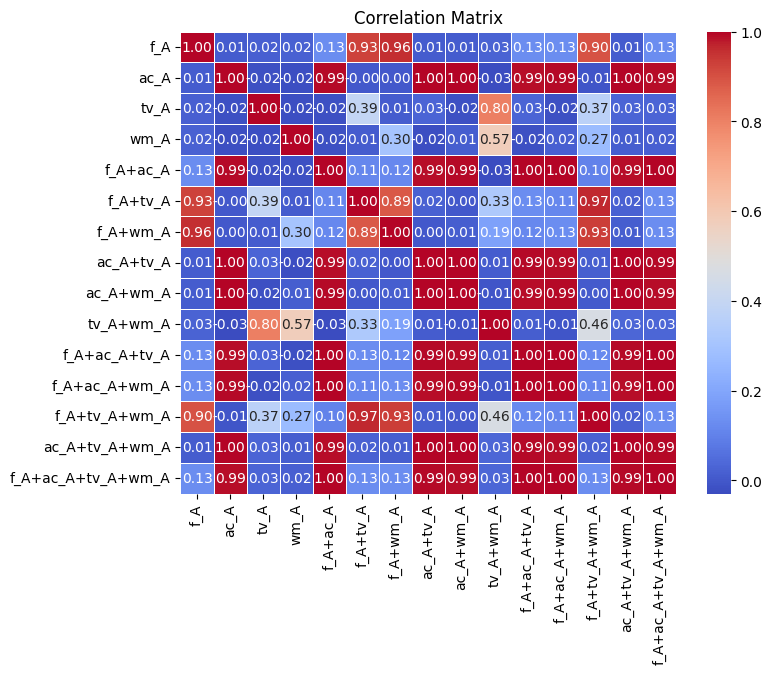

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


<Axes: xlabel='Timestamp'>

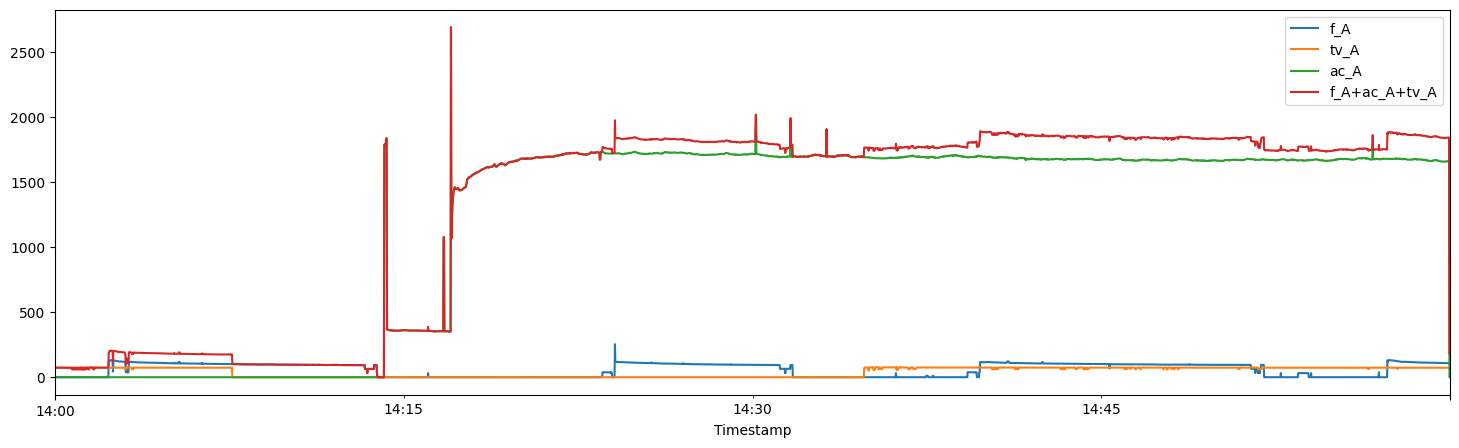

In [10]:
df1[['f_A',"tv_A","ac_A",'f_A+ac_A+tv_A',]].loc['2013-07-14 14'].plot()

<Axes: xlabel='Timestamp'>

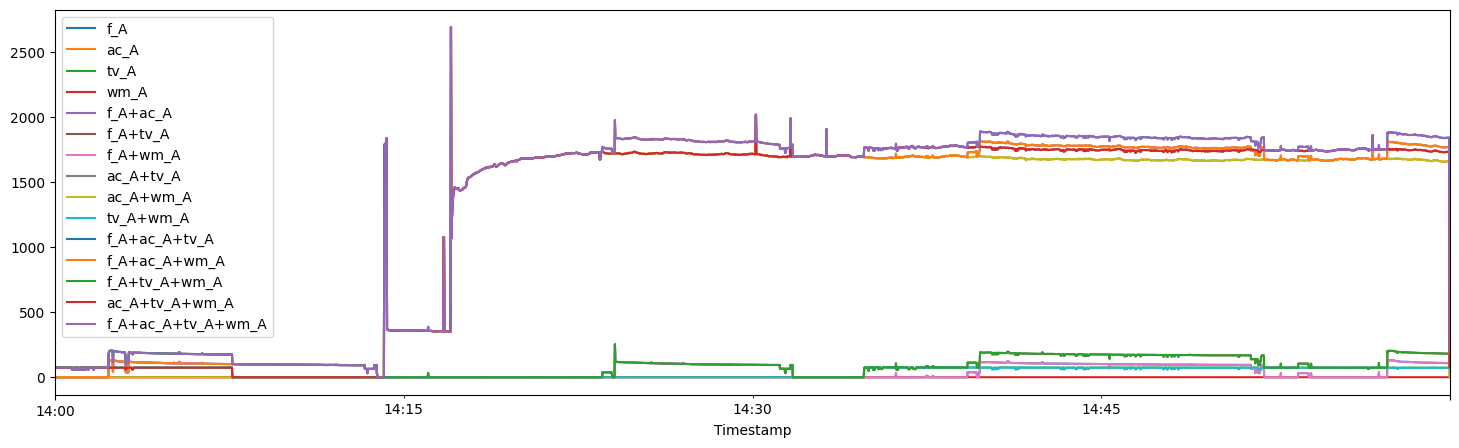

In [11]:
df1.loc['2013-07-14 14'].plot()

<Axes: xlabel='Timestamp'>

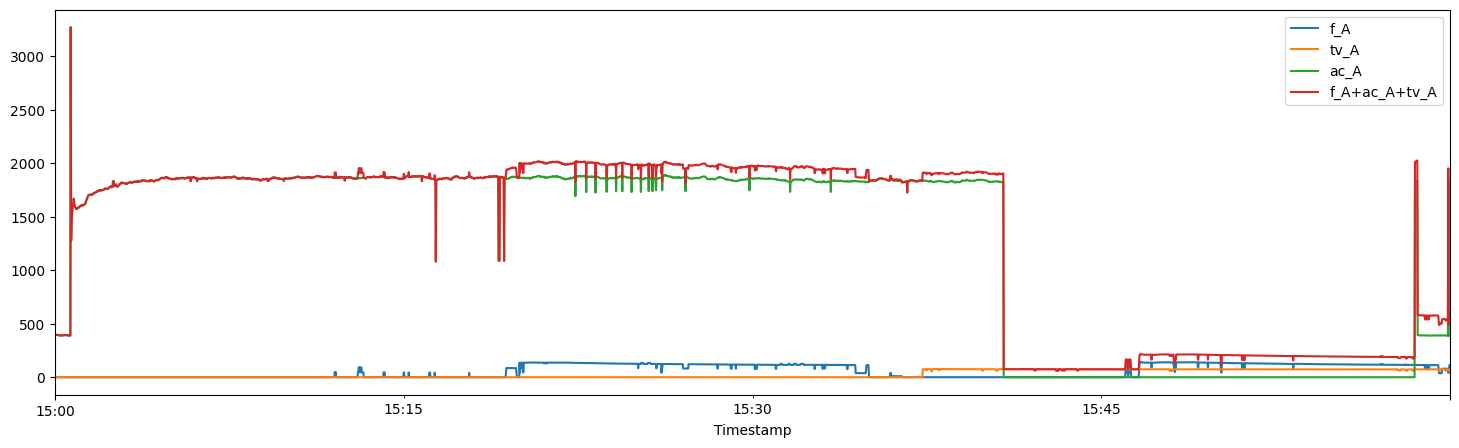

In [12]:
df1[['f_A',"tv_A","ac_A",'f_A+ac_A+tv_A',]].loc['2013-07-13 15'].plot()

<Axes: xlabel='Timestamp'>

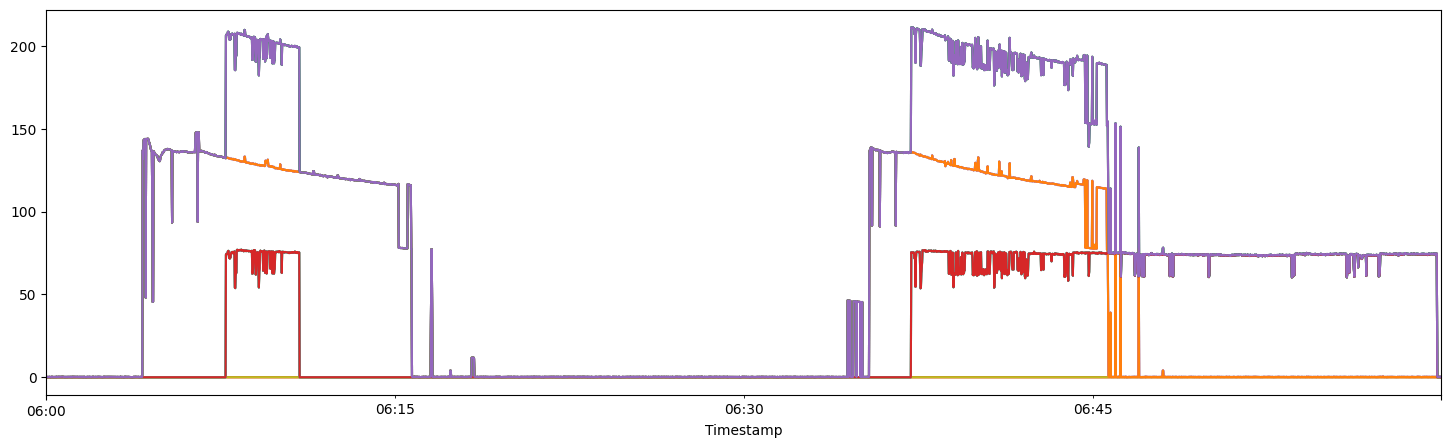

In [13]:
df1.loc['2013-07-13 06'].plot(legend=False)